C:\Users\PMLS\AppData\Local\Temp\ipykernel_7620\2303385543.py:7: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='ISO-8859-1')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB
None
        eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3     

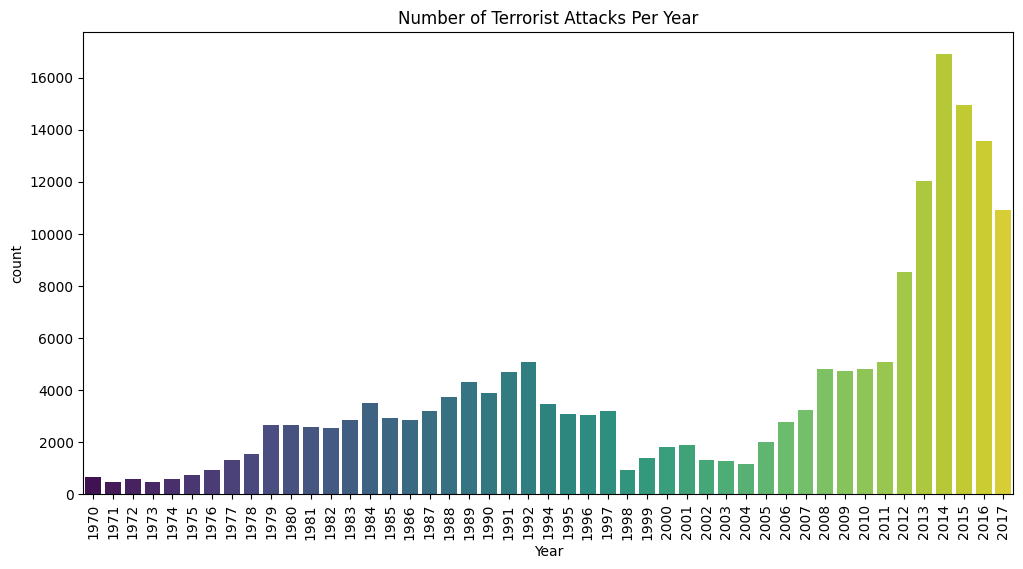

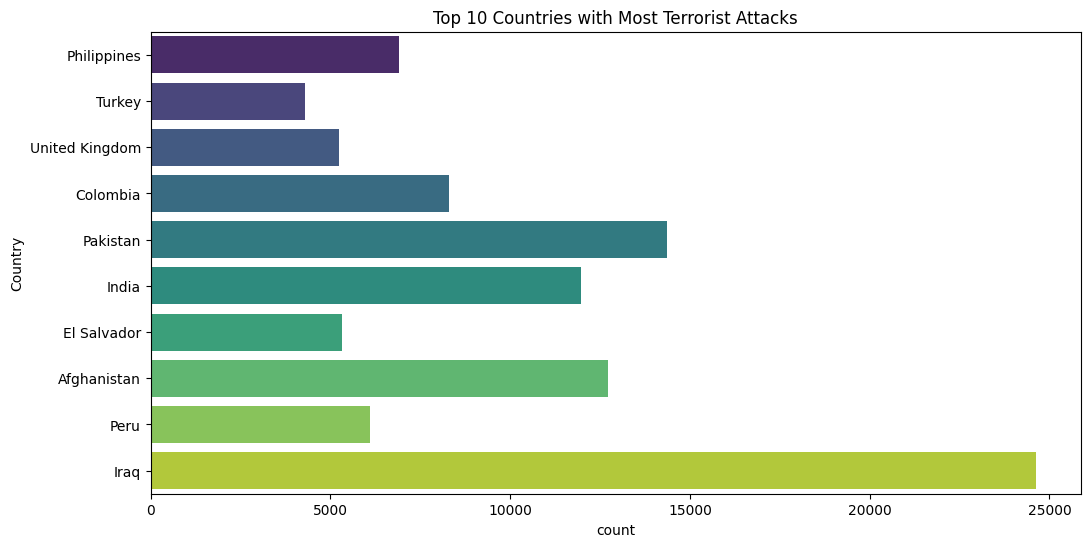

                      region_txt     country_txt  Counts
77    Middle East & North Africa            Iraq   24636
119                   South Asia        Pakistan   14368
112                   South Asia     Afghanistan   12731
115                   South Asia           India   11960
102                South America        Colombia    8306
128               Southeast Asia     Philippines    6908
108                South America            Peru    6096
18   Central America & Caribbean     El Salvador    5320
202               Western Europe  United Kingdom    5235
90    Middle East & North Africa          Turkey    4292


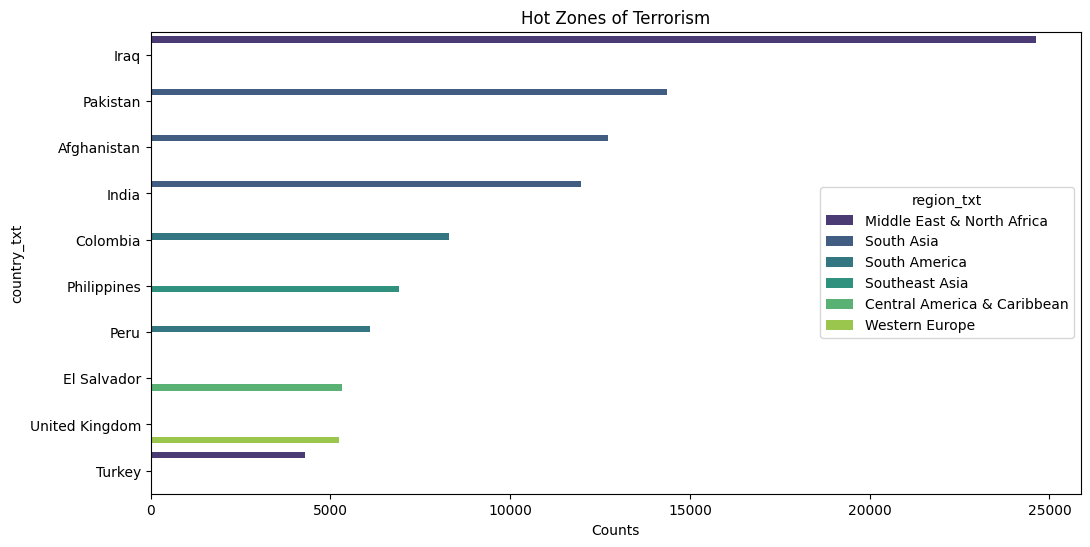

Insights:
1. The dataset contains records from 1970 to 2017.
2. The top 10 countries with the most terrorist attacks are: Iraq, Pakistan, Afghanistan, India, Colombia, Philippines, Peru, El Salvador, United Kingdom, Turkey.
3. Regions with the highest counts of terrorism are predominantly in Asia and the Middle East.


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'globalterrorismdb_0718dist.csv'  # Adjust the file path as necessary
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display basic information about the dataset
print(df.info())

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Drop columns with more than 50% missing values
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)

# Fill remaining missing values with a placeholder
df = df.fillna('Unknown')

# Create a new column for the year and country of the attack
df['Year'] = df['iyear']
df['Country'] = df['country_txt']

# Plot the number of terrorist attacks per year
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', data=df, palette='viridis')
plt.xticks(rotation=90)
plt.title('Number of Terrorist Attacks Per Year')
plt.show()

# Plot the number of terrorist attacks per country
plt.figure(figsize=(12, 6))
top_countries = df['Country'].value_counts().head(10).index
sns.countplot(y='Country', data=df[df['Country'].isin(top_countries)], palette='viridis')
plt.title('Top 10 Countries with Most Terrorist Attacks')
plt.show()

# Identify the hot zones of terrorism
hot_zones = df.groupby(['region_txt', 'country_txt']).size().reset_index(name='Counts')
hot_zones = hot_zones.sort_values(by='Counts', ascending=False).head(10)
print(hot_zones)

# Plot the hot zones of terrorism
plt.figure(figsize=(12, 6))
sns.barplot(x='Counts', y='country_txt', hue='region_txt', data=hot_zones, palette='viridis')
plt.title('Hot Zones of Terrorism')
plt.show()

# Insights from EDA
print("Insights:")
print(f"1. The dataset contains records from {df['Year'].min()} to {df['Year'].max()}.")
print(f"2. The top 10 countries with the most terrorist attacks are: {', '.join(top_countries)}.")
print("3. Regions with the highest counts of terrorism are predominantly in Asia and the Middle East.")
